### Если ноль, то просто ставлю очень маленькую вероятность, если 1, то большую

#### *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [1]:
def calc_logloss(y, y_pred):
    for i in range(len(y_pred)):
        if y_pred[i] == 0:
            y_pred[i] = 1e-10
        elif y_pred[i] == 1:
            y_pred[i] = 0.9999
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

#### Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [4]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [5]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [6]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [23]:
def eval_model(X, y, iterations, eta=1e-4):

    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        y_pred = calc_pred_proba(X, W)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % 100 == 0:
            print(i, W, err)
    return W, err

In [24]:
iterations = [200, 500, 1000, 1500, 2000, 2500, 3000, 3500]
eta = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
err = np.ones((len(iterations), len(eta)))
k = -1
h = -1
for i in iterations:
    k += 1
    for j in eta:
        h += 1
        W, err[k, h] = eval_model(X_st, y, iterations=i, eta=j)
    h = -1
    print("-------------------------------------------------")

0 [ 0.45877546 -0.2833519   0.6449505   1.46641523] 1.1785958344356262
100 [-0.17125771 -0.75500557  0.95514621  1.46737781] 0.47637022522305916
0 [ 0.49292028 -0.15277306  0.64741473  1.51736839] 1.1785958344356262
100 [ 0.29954562 -0.70184086  0.66393101  1.28809857] 0.5200176817937363
0 [ 0.49633477 -0.13971518  0.64766116  1.52246371] 1.1785958344356262
100 [ 0.46038628 -0.27784345  0.64391879  1.46838117] 0.9449083796207038
0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.1531112685708473
0 [ 0.49671036 -0.13827881  0.64768826  1.52302419] 1.1785958344356262
100 [ 0.49633116 -0.13972906  0.64766078  1.52245828] 1.1760277500878655
0 [ 0.49671377 -0.13826575  0.64768851  1.52302929] 1.1785958344356262
100 [ 0.49667584 -0.13841083  0.64768577  1.52297268] 1.1783388313608631
0 [ 0.49671412 -0.13826445  0.64768854  1.5230298 ] 1.1785958344356262
100 [ 0.49671032 -0.13827895  0.64768826  1.52302414] 1.17857013

In [11]:
import matplotlib.pyplot as plt

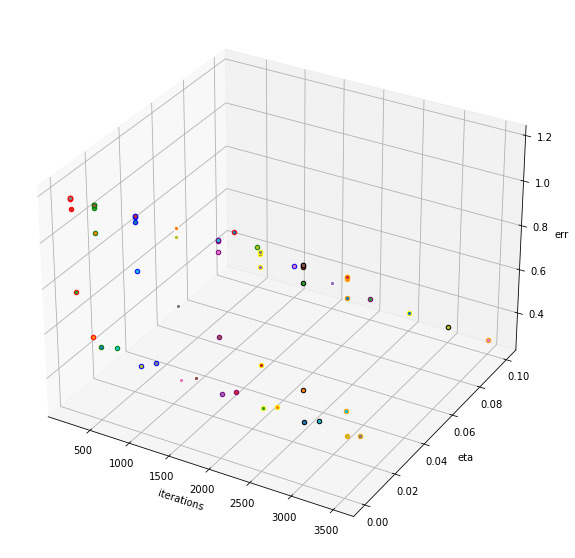

In [25]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue', 'white', 'purple', 'yellow', 'black', 'orange']
for i in range(len(iterations)):
    for j in range(len(eta)):
        ax.scatter(iterations[i], eta[j], err[i, j], edgecolors=colors[i])
ax.set_xlabel('iterations')
ax.set_ylabel('eta')
ax.set_zlabel('err')
plt.show()

### Вообще видно не очень хорошо, тут скорее всего нужно по другому 3Д построить, но точно можно сказать, то eta = 0.1 и iterations = 3500 обучилось очень даже хорошо. Посмотрев на все итерации можно реально в этом убедиться, что обучилось очень быстро и точно.

#### Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 
#### (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [20]:
def calc_pred_proba(X, W):
    y_pred_proba = sigmoid(np.dot(X, W))
    return y_pred_proba

In [29]:
def calc_pred(X, W):
    y_pred = calc_pred_proba(X, W)
    print(y_pred)
    for i in range(len(y_pred)):
        if y_pred[i]>0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    return y_pred

In [31]:
def eval_model_2(X, y, iterations, eta=1e-4):

    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        y_pred = calc_pred_proba(X, W)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % 100 == 0:
            print(i, W, err)
    return W

In [37]:
W = eval_model_2(X_st, y, 3500, eta=1e-1)
y_pred = calc_pred(X_st, W)
y_pred

0 [ 0.45877546 -0.2833519   0.6449505   1.46641523] 1.1785958344356262
100 [-0.17125771 -0.75500557  0.95514621  1.46737781] 0.47637022522305916
200 [-0.49499498 -0.82228902  0.98771187  1.75091919] 0.4571095488752876
300 [-0.79114327 -0.86672849  0.9559449   1.99242216] 0.442155509508474
400 [-1.07283403 -0.8947842   0.89607477  2.20060724] 0.4294239136608901
500 [-1.34177406 -0.91270843  0.82133512  2.38589737] 0.41815201612293285
600 [-1.59879514 -0.92438132  0.73899152  2.55492565] 0.4079867442724603
700 [-1.8445955  -0.93221288  0.65341638  2.71191591] 0.39873361980739686
800 [-2.07982431 -0.93772855  0.56729987  2.85964168] 0.39026644444254893
900 [-2.3051012  -0.94190303  0.48229109  2.99997387] 0.3824917038687346
1000 [-2.52102182 -0.94535892  0.39937552  3.13420485] 0.37533367618380076
1100 [-2.72815839 -0.94849014  0.31910983  3.26324843] 0.3687278737348425
1200 [-2.92705824 -0.95154113  0.2417729   3.38776713] 0.3626179578942704
1300 [-3.11824215 -0.95465856  0.16746498  3.5

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

### *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [53]:
import pandas as pd

In [81]:
def analyst(y_pred, y):
    kol_pred = 0
    for i in range(len(y)):
        if y[i] == y_pred[i]:
            kol_pred +=1
    accuracy_pred = kol_pred / len(y) * 100
    TP=0
    TN=0
    FP=0
    FN=0
    for i in range(len(y)):
        if y[i] == y_pred[i] and y_pred[i] == 1:
            TP += 1
        elif y[i] == y_pred[i] and y_pred[i] == 0:
            TN += 1
        elif y[i] != y_pred[i] and y_pred[i] == 1:
            FP += 1
        elif y[i] != y_pred[i] and y_pred[i] == 0:
            FN += 1
    presision = TP / (TP + FP)
    recall = TP / (TP + FN)
    F1 = 2*presision*recall / (presision + recall)
    print('Матрица ошибок')
    print(pd.DataFrame([[TP, FP],
           [FN, TN]], index = [1, 0], columns = ['1', '0']))
    
    print (f'accuracy = {accuracy_pred}%, presision = {presision}, recall = {recall}, F1 = {F1}')


In [82]:
analyst(y_pred, y)

Матрица ошибок
   1  0
1  4  0
0  1  5
accuracy = 90.0%, presision = 1.0, recall = 0.8, F1 = 0.888888888888889


### Могла ли модель переобучиться? Почему?

In [ ]:
## У нас в данном случае просто линия, при одной линии переобучится модель не может, т.к модель слишком простая и 
## четко разделяет два класса
# Если бы у нас была ПОЛИЛИНИЯ какая-нибудь, то да, конечно модель может переучиться и слишком плотно разделять классы